In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [5]:
# Load the dataset into a pandas DataFrame and display the first 5 rows
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Display descriptive statistics of the DataFrame
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


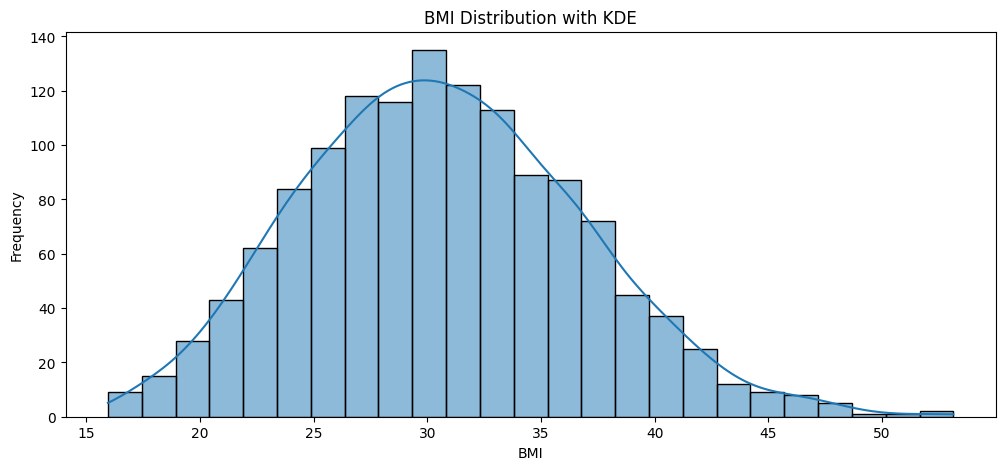

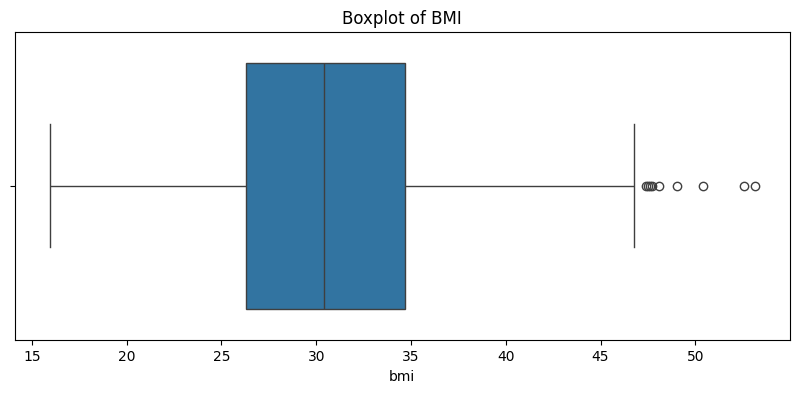

In [25]:
# Visualize the distribution of 'bmi' using a histogram and a boxplot
plt.figure(figsize=(12,5))
sns.histplot(df['bmi'],kde=True)
plt.title("BMI Distribution with KDE")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=df['bmi'])
plt.title("Boxplot of BMI")
plt.show()

In [26]:
# Calculate the IQR to identify potential outliers in 'bmi'
Q1=df['bmi'].quantile(0.25)
Q3=df['bmi'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

13.674999999999994
47.31500000000001


In [27]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [28]:
# Filter the DataFrame to remove rows with 'bmi' values outside the calculated bounds
df_cleaned=df[(df['bmi']>=lower_bound) & (df['bmi']<=upper_bound)]

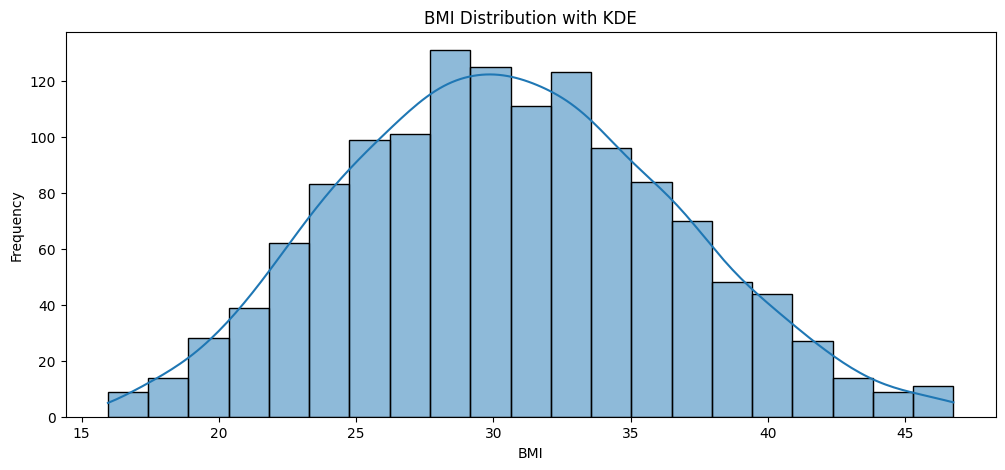

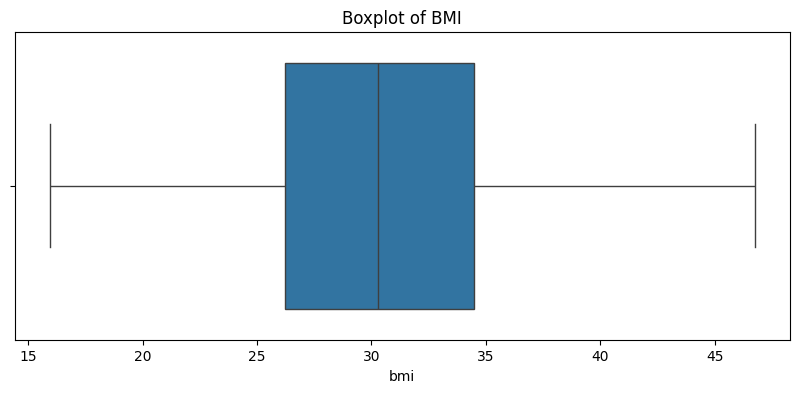

In [29]:
# Visualize the distribution of 'bmi' in the cleaned DataFrame using a histogram and a boxplot
plt.figure(figsize=(12,5))
sns.histplot(df_cleaned['bmi'],kde=True)
plt.title("BMI Distribution with KDE")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=df_cleaned['bmi'])
plt.title("Boxplot of BMI")
plt.show()

In [12]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
df_cleaned=pd.get_dummies(df_cleaned,drop_first=True)

In [14]:
df_cleaned.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.114785,0.042103,0.301317,-0.018089,-0.025075,0.001624,-0.012249,0.009868
bmi,0.114785,1.000000,0.017366,0.193270,0.039966,-0.002868,-0.128760,0.255903,0.000655
children,0.042103,0.017366,1.000000,0.069125,0.019973,0.007234,0.025449,-0.019239,0.019641
charges,0.301317,0.193270,0.069125,1.000000,0.064161,0.785896,-0.036482,0.071191,-0.046341
sex_male,-0.018089,0.039966,0.019973,0.064161,1.000000,0.080269,-0.011291,0.010721,-0.000771
smoker_yes,-0.025075,-0.002868,0.007234,0.785896,0.080269,1.000000,-0.035315,0.068055,-0.039665
region_northwest,0.001624,-0.128760,0.025449,-0.036482,-0.011291,-0.035315,1.000000,-0.344453,-0.322709
region_southeast,-0.012249,0.255903,-0.019239,0.071191,0.010721,0.068055,-0.344453,1.000000,-0.344453
region_southwest,0.009868,0.000655,0.019641,-0.046341,-0.000771,-0.039665,-0.322709,-0.344453,1.000000


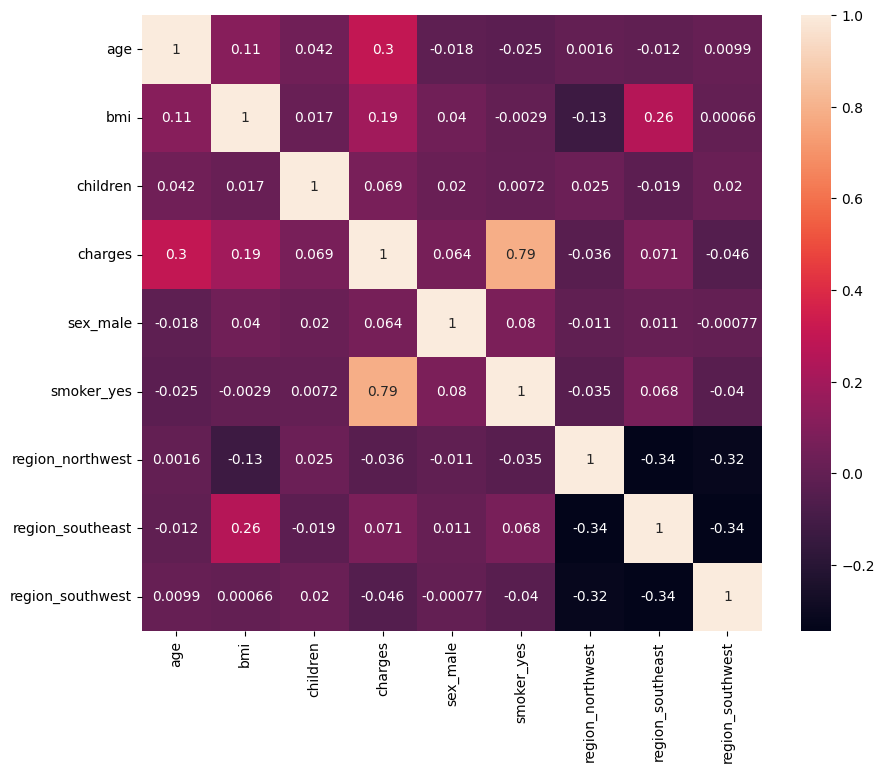

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(),annot=True)
plt.show()

In [16]:
#Feature Engineering
df_cleaned.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [17]:
x=df_cleaned[['age','bmi','smoker_yes']]
y=df_cleaned['charges']

In [18]:
#Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
# Train the linear regression model on the training data
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
# Make predictions on the test and training data
y_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)

In [21]:
# Calculate and print the R-squared score for the test and training predictions
print(f'Testing result: {r2_score(y_test,y_pred)}')
print(f'Training result: {r2_score(y_train,y_train_pred)}')

Testing result: 0.7488004023499726
Training result: 0.7455760106931366


In [22]:
# Calculate and print the Mean Squared Error (MSE) for the test predictions
mse=mean_squared_error(y_test,y_pred)
mse

34916425.2612677

In [23]:
#Create a pickle file
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(model,f)
